# Red neuronal artificial:

Consideremos nuevamente el planteamiento de la función discriminante lineal, incluyendo la posibilidad de realizar mapeos sobre las muestras iniciales:

\begin{equation}
d_i = sign\left(\boldsymbol{w}^T\phi(\boldsymbol{x_i})\right) 
\end{equation}

Esta ecuación se refiere a la decisión tomada usando un mapeo no lineal $\phi(\cdot)$ sobre la i-ésima muestra $\boldsymbol{x}_i$, multiplicada por el vector de pesos $\boldsymbol{w}$. Sin embargo, en términos generales, podemos reemplazar la función $sign$ por cualquier *función de activación*, necesariamente derivable para poder aplicar el gradiente descendente. En este sentido, es común usar las funciones $tanh(\cdot)$ o sigmoidal $\sigma(\cdot)$:

\begin{equation}
\sigma(x) = \frac{1}{1+e^{-x}}
\end{equation}


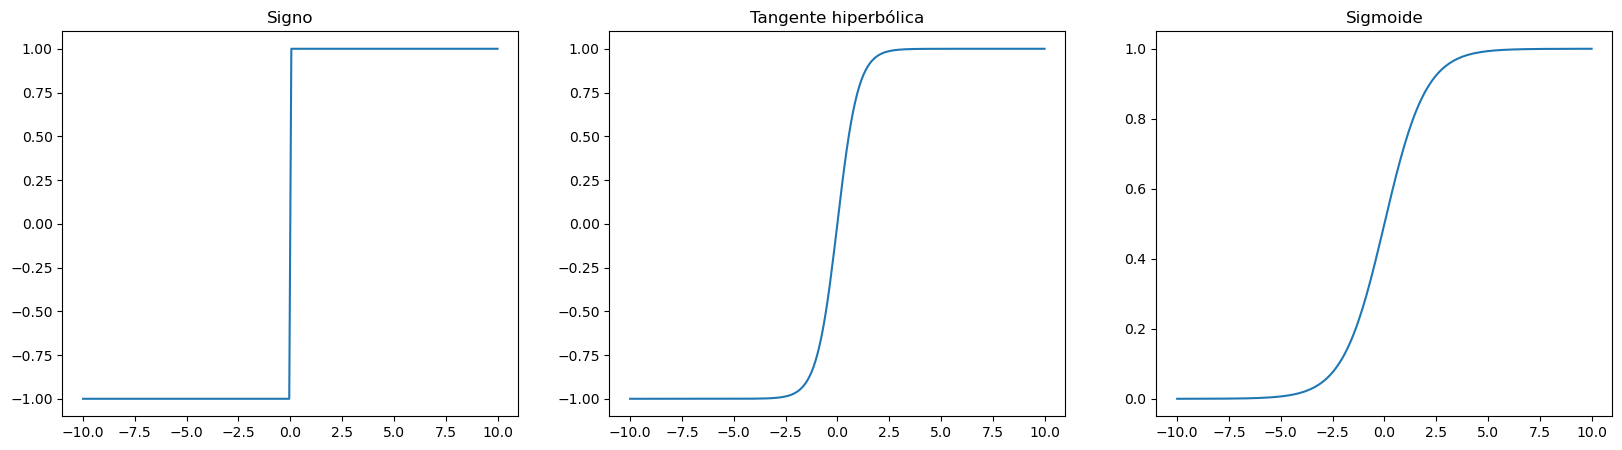

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-10,10,200)
signo=np.sign(x)
tangente=np.tanh(x)
def sigm(x):
    y = 1/(1+np.exp(-x))
    return(y)
sigmoidal=sigm(x)

#Gráficas
plt.rcParams["figure.figsize"]=20,5 #Modifica el tamaño de la gráfica
plt.subplot(1,3,1)
plt.plot(x,signo)
plt.title('Signo')
plt.subplot(1,3,2)
plt.plot(x,tangente)
plt.title('Tangente hiperbólica')
plt.subplot(1,3,3)
plt.plot(x,sigmoidal)
plt.title('Sigmoide')
plt.show()

Ahora, para definir las funciones base $\phi(\cdot)$, las redes neuronales usan modelos paramétricos con la misma forma de la función de decisión. En otras palabras, tenemos varias *capas* de funciones de decisión donde la salida de cada una se convierte en la entrada de la siguiente. Gráficamente, podemos representar cada una de estas funciones de decisión como la sumatoria de las entradas ponderadas por los pesos del modelo y que luego pasan por la función de activación:

![](../doc/perceptron.png)

Este modelo lo llamaremos entonces una *neurona* y la conexión de las diferentes capas de neuronas conforman la red neuronal del tipo llamado *perceptrón multicapa* o *feedforward*:

<div>
<img src="../doc/ann.png" width="500"/>
</div>

Las capas que se encuentran antes de la capa de salida se denominan "capas ocultas". Consideremos entonces el valor que tendría una de las neuronas de la capa de salida para una red neuronal con sólo una capa oculta:

\begin{equation}
s_k = \sigma_2\left ( \boldsymbol{w}_{k,2}^T \boldsymbol{d}\right)
\end{equation}

Siendo $\boldsymbol{d}$ el vector de todas las salidas de la capa oculta:

\begin{equation}
d_j = \sigma_1\left ( \boldsymbol{w}_{j,1}^T \boldsymbol{x}\right)
\end{equation}

Aquí tenemos entonces que $\sigma_l$ es la función de activación para la capa $l$, y $\boldsymbol{w}_{j,l}$ es el vector de pesos para j-ésima neurona de la capa $l$.

¿Cuántos pesos habrá que calcular para una red neuronal de 3 entradas, 2 salidas y 2 capas ocultas de 4 neuronas cada una?



# Algoritmo Backpropagation

Al igual que con el perceptrón simple,  el algoritmo de entrenamiento para una red neuronal del tipo perceptrón multicapa, está basado en el gradiente descendente estocástico:

\begin{equation}
\boldsymbol{w}^{(\tau+1)} = \boldsymbol{w}^{(\tau)} - \alpha\nabla \varepsilon_p
\end{equation}

donde $\varepsilon_p$ es el error basado cometido por el clasificador para la muestra $p$. Usando mínimos cuadrados, tenemos:

\begin{equation}
\varepsilon_p = \frac{1}{2}\sum_k (s_{k,p} - y_{k,p})^2
\end{equation}

donde $s_{k,p}$ es la k-ésima salida de la red para la muestra $p$ y $y_{k,p}$ es el objetivo correspondiente (etiqueta).

Ahora, como sabemos que s_{k,p} es la salida de la k-ésima neurona de la capa de salida y que ésta a su vez se alimenta de las capas anteriores hasta la de entreada, tendremos:

\begin{equation}
\varepsilon_p = \frac{1}{2}\sum_k (\sigma_l\left ( \boldsymbol{w}_{k,l}^T   \sigma_{l-1}\left ( \boldsymbol{w}_{j,l-1}^T  \sigma_{l-2}\left ( \boldsymbol{w}_{j,l-2}^T\ldots\sigma_1(\boldsymbol{w}_{j,1}^T\boldsymbol{x}_p)\right)  \right)\right) - y_{k,p})^2
\end{equation}

Ahora la tarea consiste en encontrar el gradiente de este error respecto a **todos** los pesos $w$. Para entenderlo mejor, consideremos un ejemplo con una red neuronal de solamente 3 capas (capa de entrada, capa oculta y capa de salida) y funciones de activación tanh. Las entradas serán $\boldsymbol{x}$, la salida de la capa oculta la llamaremos $\boldsymbol{d}$ y la salida total será $\boldsymbol{s}$, de manera que:

\begin{equation}
s_k = \sigma\left ( \boldsymbol{w_{k,2}}^T \boldsymbol{d}\right)
\end{equation}

y 

\begin{equation}
d_j = \sigma\left ( \boldsymbol{w_{j,1}}^T \boldsymbol{x}\right)
\end{equation}

Tenemos entonces que la función de error será:

\begin{equation}
\varepsilon = \frac{1}{2}\sum_k (s_{k} - y_{k})^2 \\
\end{equation}

Primero derivemos respecto a los pesos de la capa de salida:

\begin{equation}
 \frac{\partial \varepsilon}{\partial \boldsymbol{w}_{k,2}} =\sum_k ( s_{k} - y_{k})\frac{\partial s_k}{\partial  \boldsymbol{w}_{k,2}} \\
\end{equation}

Para derivar a su vez $s_k$, necesitamos saber que la derivada de la función de activación es:

\begin{equation}
\frac{\partial \;tanh(a)}{\partial a} = 1 - tanh(a)^2
\end{equation}

por lo tanto:

\begin{equation}
\begin{array}{rl}
 \frac{\partial s_k}{\partial \boldsymbol{w}_{k,2}} & = \frac{\partial  \sigma\left ( \boldsymbol{w}_{k,2}^T \boldsymbol{d}\right)}{\partial \boldsymbol{w}_{k,2}}\\
 & = \left(1-s_k^2 \right) \frac{\partial  \left (\boldsymbol{w}_{k,2}^T \boldsymbol{d}\right)}{\partial \boldsymbol{w}_{k,2}}\\
 & = \left(1-s_k^2 \right)\boldsymbol{d} 
 \end{array}
\end{equation}

de manera que al final tenemos:
**Ecuación 1:**

\begin{equation}
\frac{\partial\varepsilon}{\partial \boldsymbol{w}_{k,2}} = \sum_k ( s_{k} - y_{k}) \left(1-s_k^2 \right)\boldsymbol{d} 
\end{equation}

Similarmente, podemos obtener las derivadas respecto a los pesos de la capa oculta como:
**Ecuación 2:**

\begin{equation}
\frac{\partial\varepsilon}{\partial \boldsymbol{w}_{j,1}} = \sum_k ( s_{k} - y_{k}) \left(1-s_k^2 \right)\boldsymbol{w}_{k,2}^T (1-d_j^2)\boldsymbol{x} 
\end{equation}





El algoritmo *backpropagation* procede entonces de la siguiente manera:

* Inicializar todos los pesos de todas las capas aleatoriamente.
* Aplicar una muestra $\boldsymbol{x}_p$ a la entrada de la red y propagarla hacia adelante para encontrar los valores de activación de todas las neuronas ocultas y de salida.
* Evaluar los errores $s_{k} - y_{k}$ para todas las neuronas de salida.
* Propagar estos errores hacia atrás para obtener los errores en las capas ocultas
* Usar los errores para calcular la derivada y actualizar $\boldsymbol{w}$ usando el gradiente descendente.



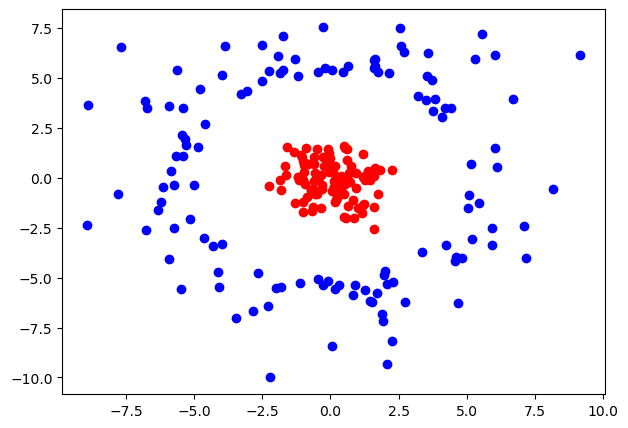

In [3]:
Xred=np.random.normal(size=[100,2])
Xblue=np.random.normal(size=[500,2],scale=3)
borrar=np.where(np.sqrt(Xblue[:,0]**2+Xblue[:,1]**2)<5)
Xblue=np.delete(Xblue,borrar,axis=0)
plt.rcParams["figure.figsize"]=7,5 #Modifica el tamaño de la gráfica
plt.scatter(Xred[:, 0], Xred[:, 1],c='red')
plt.scatter(Xblue[:, 0], Xblue[:, 1],c='blue')
plt.show()

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1]
[array([[ 0.36834644, -0.28429998,  0.0496297 ,  0.78591465,  0.51223856],
       [-0.69330824,  0.94788739,  0.83442824,  0.58486546,  0.54487739],
       [-0.22978262, -0.81236242,  0.04527867, -0.895573  ,  0.48708802]]), array([[ 1.13017924],
       [-0.92121313],
       [ 1.94725895],
       [-1.22765595],
       

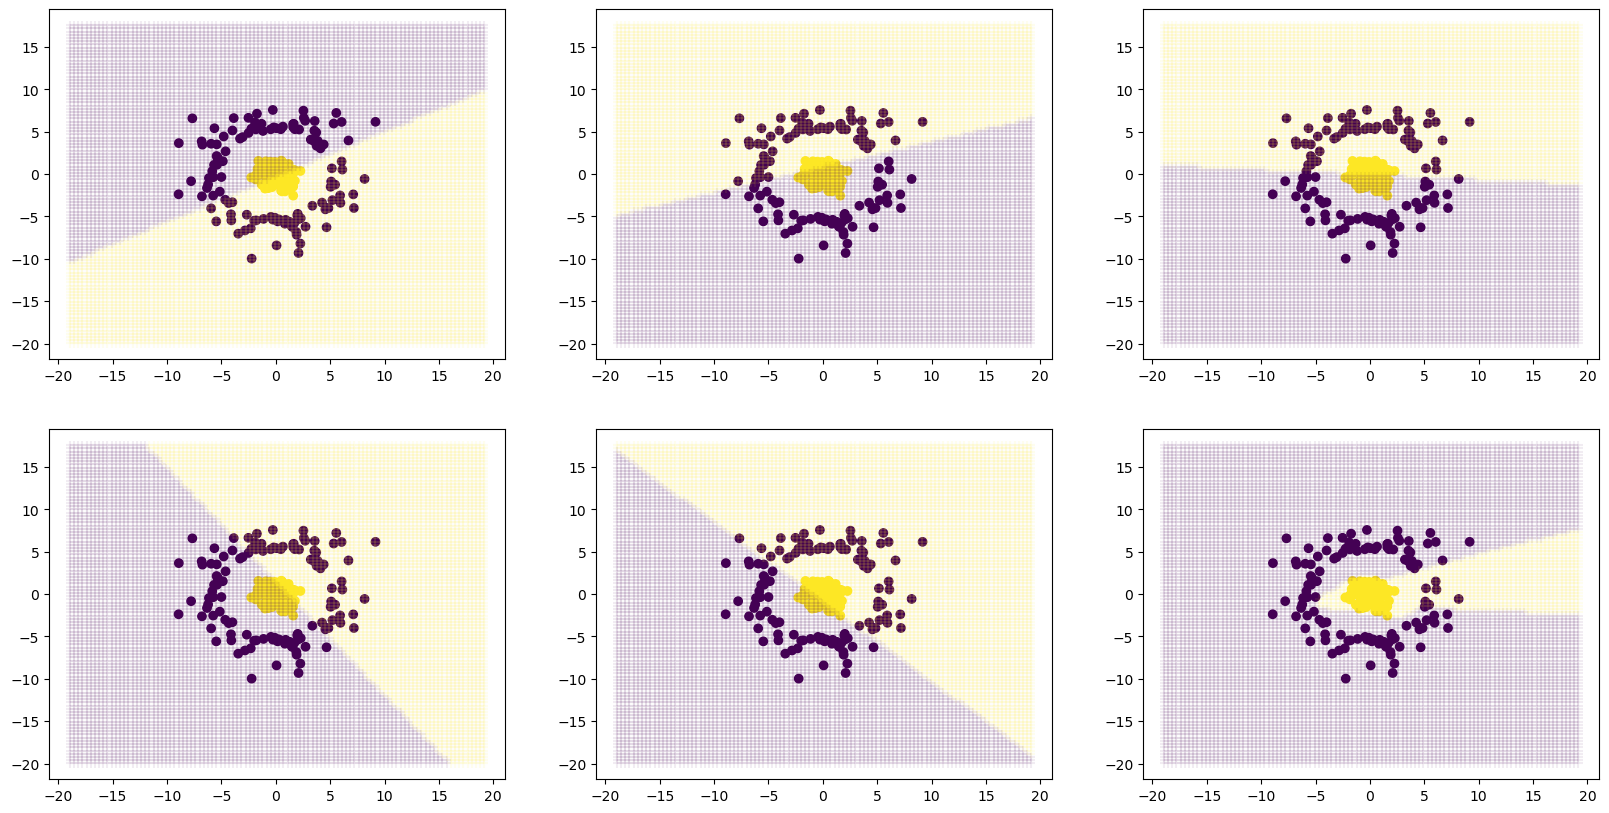

In [6]:
from sklearn.neural_network import MLPClassifier #Perceptrón multi-capa

X=np.vstack((Xred,Xblue)) #Matriz de características
Xm=np.hstack((X,np.ones((len(X),1)))) #Agregamos unos en la última columna de X
y=np.append(np.repeat(1,len(Xred)),np.repeat(-1,len(Xblue))) #Etiquetas
print(y)
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(5),activation='tanh',max_iter=10000) #Arquitectura
clf.fit(Xm, y) #Entrenamiento

print(clf.coefs_)

x1, x2 = np.meshgrid(np.linspace(min(X[:,0]-10),max(X[:,0]+10),100),np.linspace(min(X[:,1]-10),max(X[:,1]+10),100))

plt.rcParams["figure.figsize"]=20,10 #Modifica el tamaño de la gráfica
w0=clf.coefs_[0][0:3,0]
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(np.transpose(w0).dot(x))
plt.subplot(2,3,1)
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.075)

w1=clf.coefs_[0][0:3,1]
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(np.transpose(w1).dot(x))
plt.subplot(2,3,2)
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.075)

w2=clf.coefs_[0][0:3,2]
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(np.transpose(w2).dot(x))
plt.subplot(2,3,3)
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.075)

w3=clf.coefs_[0][0:3,3]
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(np.transpose(w3).dot(x))
plt.subplot(2,3,4)
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.075)

w4=clf.coefs_[0][0:3,4]
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(np.transpose(w4).dot(x))
plt.subplot(2,3,5)
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.075)

decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]).reshape(1,-1) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = clf.predict(x)[0]
plt.subplot(2,3,6)
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.075)



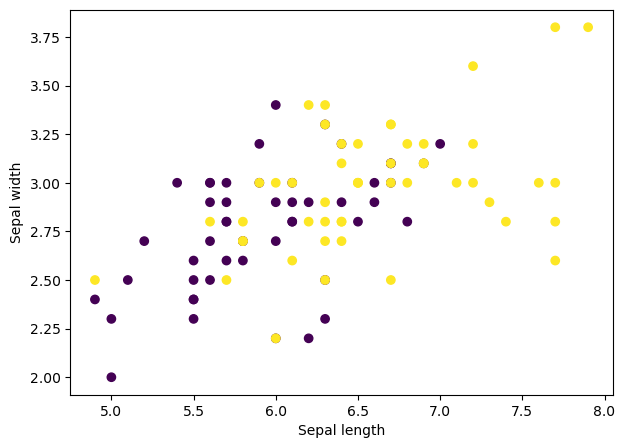

In [7]:
from sklearn import datasets
# Importamos la base de datos iris
iris = datasets.load_iris()
X = iris.data[50:150, :2]  # Esta vez tomamos las clases versicolor y virginica que son linealmente no separables
y = iris.target[50:150]
plt.rcParams["figure.figsize"]=7,5 #Modifica el tamaño de la gráfica
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

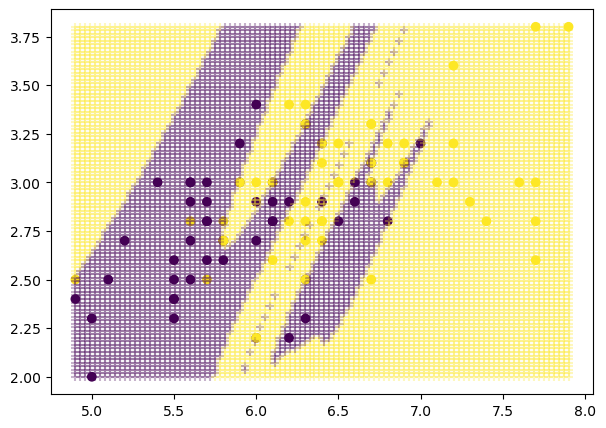

In [11]:
from sklearn.neural_network import MLPClassifier #Perceptrón multi-capa
Xm=np.hstack((X,np.ones((len(X),1)))) #Agregamos unos en la última columna de X
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20,20,20,20,20,20,20,20),activation='tanh',max_iter=100000)
clf.fit(Xm, y)

x1, x2 = np.meshgrid(np.linspace(min(X[:,0]),max(X[:,0]),100),np.linspace(min(X[:,1]),max(X[:,1]),100))
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        x=np.reshape(x,(1,len(x))) #Se redimensiona como una matriz para que la función de distancias se calcule correctamente
        decision[i,j]=clf.predict(x)[0]
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.3)